In [1]:
# data science imports
import numpy as np
import pandas as pd
from pandas import DataFrame

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Statistics packages
import pylab
import statsmodels.api as sm
import statistics
from scipy import stats


In [3]:
# Import chisquare from SciPy.stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

In [4]:
# Load data set into Pandas dataframe
df = pd.read_csv('C:\\Users\\josue\\Desktop\\WGU\\D207\\churn_cleanedtest.csv')

print(df)
#describe the dataset
df.describe()

      Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0              0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1              1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2              2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3              3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4              4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...          ...        ...         ...                                   ...   
9995        9995       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996        9996       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997        9997       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998        9998       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999        9999      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

              City State   

,Unnamed: 0,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,...,MonthlyCharge,Bandwidth_GB_Year,Responses,Solutions,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,1.822500,53.207500,38256.017897,11.452955,...,174.076305,3397.166397,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,2886.89568,27532.196108,5.437389,15.156142,14432.698671,1.925971,18.003457,24747.872761,7.025921,...,43.335473,2072.718575,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.00000,1.00000,601.000000,17.966120,-171.688150,0.000000,0.000000,18.000000,740.660000,-1.348571,...,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2499.75000,2500.75000,26292.500000,35.341828,-97.082812,738.000000,1.000000,41.000000,23660.790000,8.054362,...,141.071078,1312.130487,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,4999.50000,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.000000,53.000000,33186.785000,10.202896,...,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7499.25000,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.000000,65.000000,45504.192500,12.487644,...,203.777441,5466.284500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,9999.00000,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.000000,89.000000,258900.700000,47.049280,...,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [5]:
#remove unwanted columns
unwanted_columns = ["unnamed", "Interaction", "Lat", "Lng"]

for uc in unwanted_columns:
    if uc in df.columns:
        df.drop(columns=uc, inplace=True)
print (df)        

      Unnamed: 0  CaseOrder Customer_id          City State  \
0              0          1     K409198   Point Baker    AK   
1              1          2     S120509   West Branch    MI   
2              2          3     K191035       Yamhill    OR   
3              3          4      D90850       Del Mar    CA   
4              4          5     K662701     Needville    TX   
...          ...        ...         ...           ...   ...   
9995        9995       9996     M324793   Mount Holly    VT   
9996        9996       9997     D861732   Clarksville    TN   
9997        9997       9998     I243405      Mobeetie    TX   
9998        9998       9999     I641617    Carrollton    GA   
9999        9999      10000      T38070  Clarkesville    GA   

                     County    Zip  Population      Area             Timezone  \
0     Prince of Wales-Hyder  99927          38     Urban        America/Sitka   
1                    Ogemaw  48661       10446     Urban      America/Detroit   


In [6]:
#crosstab churn and outage sec perweek
contingency = pd.crosstab(df['Churn'], df['Outage_sec_perweek'])
contingency

Outage_sec_perweek,-1.348571,-1.195428,-1.099934,-0.787115,-0.527396,-0.352431,-0.339214,-0.214328,-0.206145,-0.152845,...,45.240000,45.758110,45.900879,45.914470,46.021694,46.054249,46.511607,46.641806,47.027660,47.049280
Churn,,,,,,,,,,,,,,,,,,,,,
No,1,0,0,1,1,1,0,1,1,0,...,1,1,1,1,0,0,0,0,1,1
Yes,0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,1,1,1,1,0,0


In [7]:
#get the % of out test variables
contingency_pct = pd.crosstab(df['Churn'], df['Outage_sec_perweek'], normalize='index')
contingency_pct

Outage_sec_perweek,-1.348571,-1.195428,-1.099934,-0.787115,-0.527396,-0.352431,-0.339214,-0.214328,-0.206145,-0.152845,...,45.240000,45.758110,45.900879,45.914470,46.021694,46.054249,46.511607,46.641806,47.027660,47.049280
Churn,,,,,,,,,,,,,,,,,,,,,
No,0.000136,0.000000,0.000000,0.000136,0.000136,0.000136,0.000000,0.000136,0.000136,0.000000,...,0.000136,0.000136,0.000136,0.000136,0.000000,0.000000,0.000000,0.000000,0.000136,0.000136
Yes,0.000000,0.000377,0.000377,0.000000,0.000000,0.000000,0.000377,0.000000,0.000000,0.000377,...,0.000000,0.000000,0.000000,0.000000,0.000377,0.000377,0.000377,0.000377,0.000000,0.000000


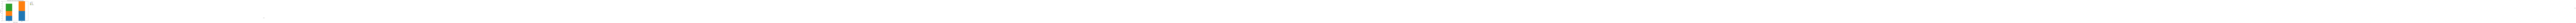

In [8]:
# Example contingency_pct data
data = {
    'MonthlyCharge': [20, 200],
    'Low': [0.4, 0.6],  # Example percentages for churned customers
    'High': [0.2, 0.8]  # Example percentages for non-churned customers
}

# Convert data to DataFrame
contingency_pct = pd.DataFrame(data)
contingency_pct.set_index('MonthlyCharge', inplace=True)

# Calculate median for each monthly charge category
contingency_pct['Median'] = contingency_pct.median(axis=1)

# Plotting the grouped bar chart
ax = contingency_pct.plot(kind='bar', stacked=True, figsize=(8, 6))

# Add labels and title
plt.title('Stacked Bar Chart of Churn and MonthlyCharge')
plt.xlabel('Monthly Charge')
plt.ylabel('Percentage')
plt.xticks(rotation=0)  # Rotate x-labels
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set y-axis limits
plt.ylim(0.2, 1)

# Add median values as text
for index, row in contingency_pct.iterrows():
    ax.text(index - 0.2, row['Median'] + 0.01, f"{row['Median']:.2f}", color='black')

plt.show()

In [9]:
# Chi-square test of independence
c, p, dof, expected = chi2_contingency(contingency)
print('p-value = ' + str(p))


p-value = 0.5117646796266972


In [10]:
df.describe()

,Unnamed: 0,CaseOrder,Zip,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,...,MonthlyCharge,Bandwidth_GB_Year,Responses,Solutions,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,5000.50000,49153.319600,9756.562400,1.822500,53.207500,38256.017897,11.452955,12.016000,0.994200,...,174.076305,3397.166397,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,2886.89568,27532.196108,14432.698671,1.925971,18.003457,24747.872761,7.025921,3.025898,0.988466,...,43.335473,2072.718575,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.00000,1.00000,601.000000,0.000000,0.000000,18.000000,740.660000,-1.348571,1.000000,0.000000,...,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2499.75000,2500.75000,26292.500000,738.000000,1.000000,41.000000,23660.790000,8.054362,10.000000,0.000000,...,141.071078,1312.130487,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,4999.50000,5000.50000,48869.500000,2910.500000,1.000000,53.000000,33186.785000,10.202896,12.000000,1.000000,...,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7499.25000,7500.25000,71866.500000,13168.000000,3.000000,65.000000,45504.192500,12.487644,14.000000,2.000000,...,203.777441,5466.284500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,9999.00000,10000.00000,99929.000000,111850.000000,10.000000,89.000000,258900.700000,47.049280,23.000000,7.000000,...,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


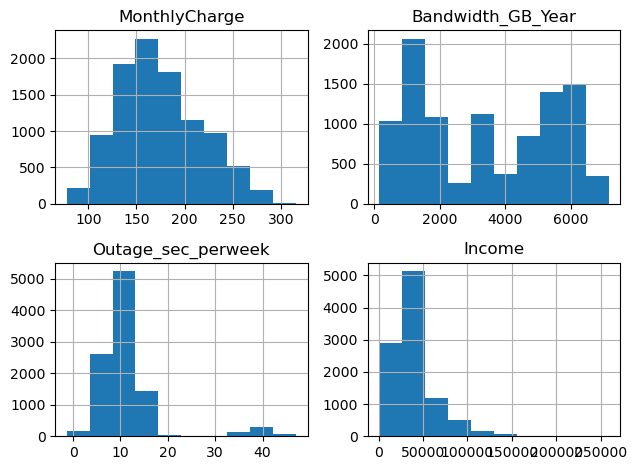

In [11]:
# Create histograms of contiuous 
df[['MonthlyCharge', 'Bandwidth_GB_Year', 'Outage_sec_perweek', 'Income']].hist()
plt.savefig('churn_pyplot.jpg')
plt.tight_layout()

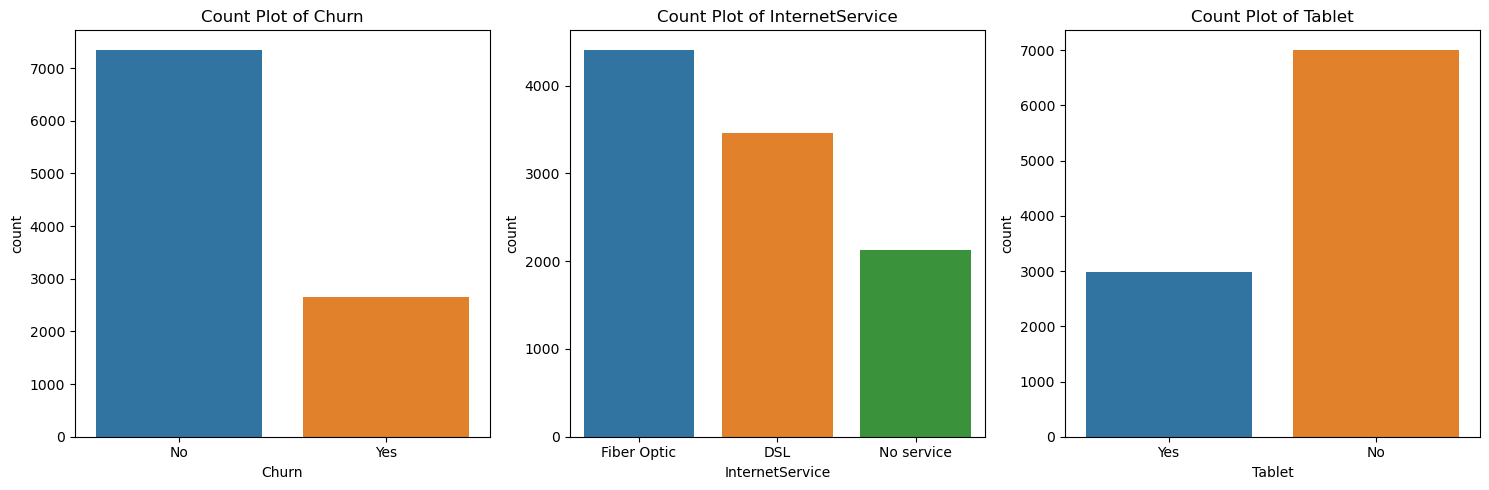

In [12]:
# List of categorical variables
categorical_vars = ['Churn', 'InternetService', 'Tablet']

# Create count plots for each categorical variable
plt.figure(figsize=(15, 5))

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(1, len(categorical_vars), i)
    sns.countplot(x=var, data=df)
    plt.title(f'Count Plot of {var}')

plt.tight_layout()
plt.show()

In [13]:
# Describe the categorical variables
categorical_description = df[categorical_vars].describe()

# Print the description
print(categorical_description)

        Churn InternetService Tablet
count   10000           10000  10000
unique      2               3      2
top        No     Fiber Optic     No
freq     7350            4408   7009


<Axes: xlabel='MonthlyCharge'>

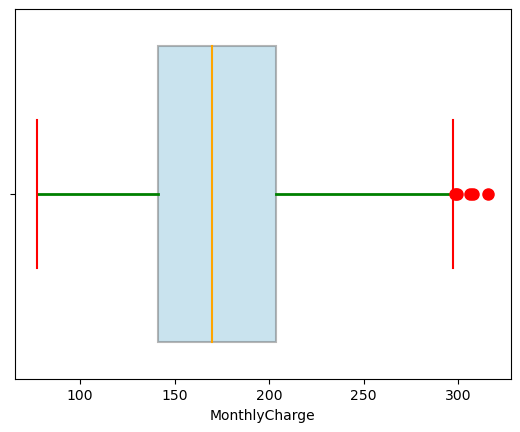

In [14]:
# Create Seaborn boxplots for continuous 
sns.boxplot(x='MonthlyCharge', data=df, color='skyblue',  # Color of the boxes
            boxprops=dict(alpha=0.5),  # Transparency of the boxes
            whiskerprops=dict(color='green', linewidth=2),  # Color and width of whiskers
            capprops=dict(color='red'),  # Color of the caps
            medianprops=dict(color='orange'),  # Color of the median line
            flierprops=dict(marker='o', markersize=8, markerfacecolor='red', markeredgecolor='red'))  # Color and size of outliers

<Axes: xlabel='Outage_sec_perweek'>

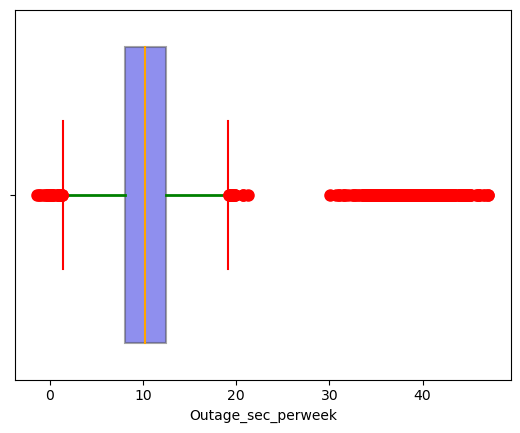

In [15]:
sns.boxplot(x='Outage_sec_perweek', data=df, color='blue',  # Color of the boxes
            boxprops=dict(alpha=0.5),  # Transparency of the boxes
            whiskerprops=dict(color='green', linewidth=2),  # Color and width of whiskers
            capprops=dict(color='red'),  # Color of the caps
            medianprops=dict(color='orange'),  # Color of the median line
            flierprops=dict(marker='o', markersize=8, markerfacecolor='red', markeredgecolor='red'))  # Color and size of outliers

In [16]:
# Create dataframe for heatmap bivariate  for our contiunous variables 
bivariate = df[['MonthlyCharge', 'Bandwidth_GB_Year', 'Income', 'Outage_sec_perweek']]
#describe the bivariate variables
bivariate_description = bivariate.describe()
print(bivariate_description)

       MonthlyCharge  Bandwidth_GB_Year         Income  Outage_sec_perweek
count   10000.000000       10000.000000   10000.000000        10000.000000
mean      174.076305        3397.166397   38256.017897           11.452955
std        43.335473        2072.718575   24747.872761            7.025921
min        77.505230         155.506715     740.660000           -1.348571
25%       141.071078        1312.130487   23660.790000            8.054362
50%       169.915400        3382.424000   33186.785000           10.202896
75%       203.777441        5466.284500   45504.192500           12.487644
max       315.878600        7158.982000  258900.700000           47.049280


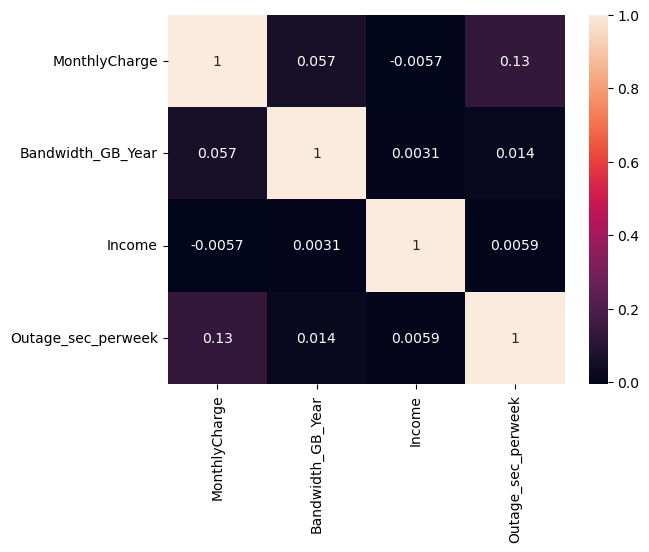

In [17]:
#print heatmap
sns.heatmap(bivariate.corr(), annot=True)
plt.show()


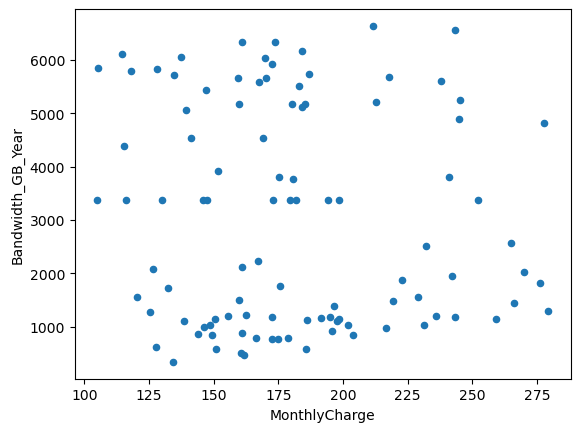

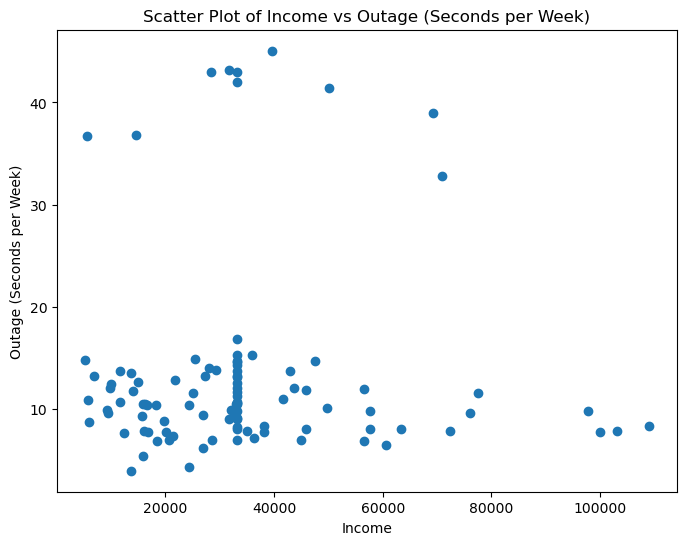

In [18]:
# Create dataframe for  bivariate  for our contiunous variables 
churn_bivariate = df[['MonthlyCharge', 'Bandwidth_GB_Year', 'Income', 'Outage_sec_perweek']]

# Create a scatter plot of continuous variables MonthlyCharge & Bandwidth_GB_Year
churn_bivariate[churn_bivariate['MonthlyCharge'] < 300].sample(100).plot.scatter(x='MonthlyCharge', 
                                                                                 y='Bandwidth_GB_Year')
# Create scatter plot of Income vs Outage_sec_perweek
plt.figure(figsize=(8, 6))
plt.scatter(x='Income', y='Outage_sec_perweek', data=churn_bivariate.sample(min(100, len(churn_bivariate))))
plt.xlabel('Income')
plt.ylabel('Outage (Seconds per Week)')
plt.title('Scatter Plot of Income vs Outage (Seconds per Week)')
plt.show()

<Figure size 1000x600 with 0 Axes>

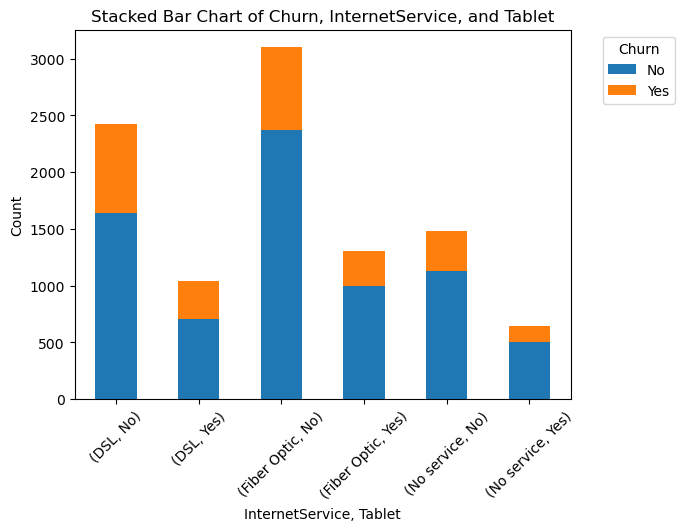

In [19]:
# Create a DataFrame containing the count of each combination of categories
stacked_data = df.groupby(['InternetService', 'Tablet', 'Churn']).size().unstack()

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
stacked_data.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Churn, InternetService, and Tablet')
plt.xlabel('InternetService, Tablet')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Axes: xlabel='Income', ylabel='Outage_sec_perweek'>

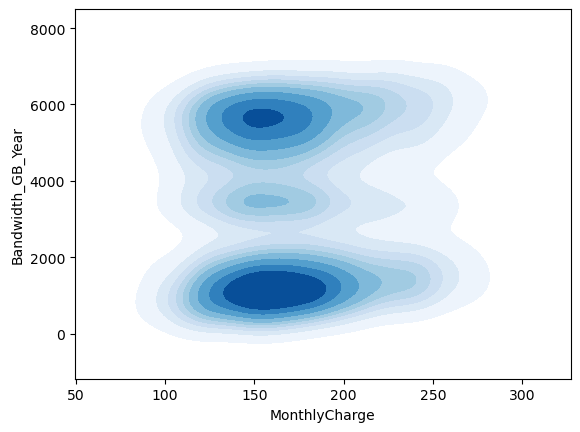

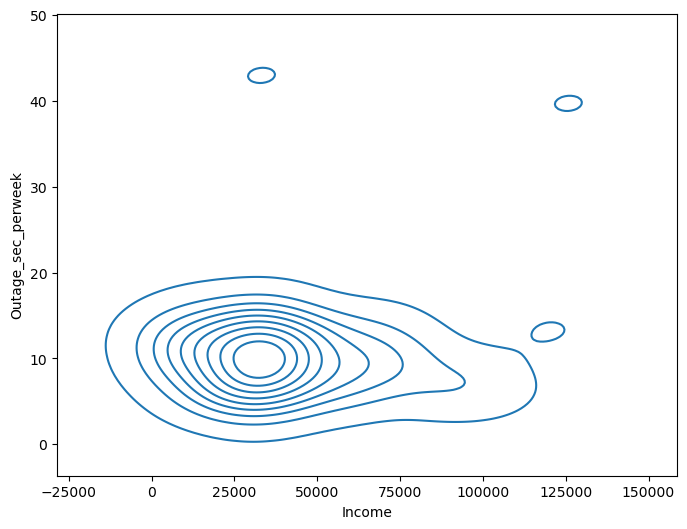

In [20]:
#create a visual represntation of so we can see how the data is distributed compared to a scatter plot
sns.kdeplot(data=bivariate[bivariate['MonthlyCharge'] < 300], x='MonthlyCharge', y='Bandwidth_GB_Year', cmap='Blues', fill=True)

plt.figure(figsize=(8, 6))
sns.kdeplot(x='Income', y='Outage_sec_perweek', data=churn_bivariate.sample(min(100, len(churn_bivariate))))